In [6]:
from sklearn.datasets import load_iris

# Import necessary library

# Load the Iris dataset
iris = load_iris()

# convert to dataframe
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Drop rows where the target is 2
df = df[df['target'] != 2]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)


In [8]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[12  0]
 [ 0  8]]


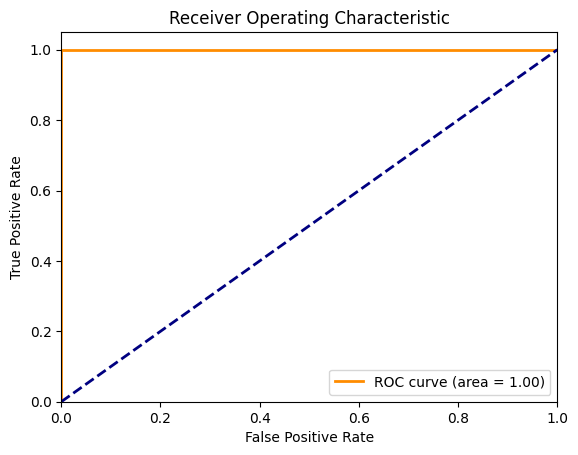

In [9]:
# ROC AUC Curve plot 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

roc = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()


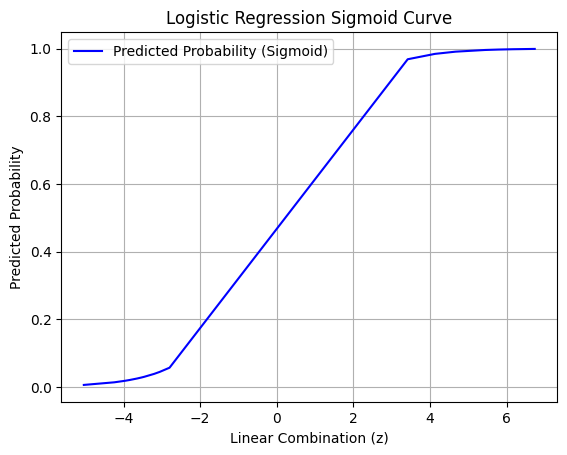

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the linear combination (z)
z = X_test.values @ model.coef_.T + model.intercept_
z = z.flatten() # Ensure z is a 1D array

# Get the predicted probabilities for the positive class (class 1)
probabilities = model.predict_proba(X_test)[:, 1]

# Sort the values based on z for a smooth plot
sorted_indices = np.argsort(z)
z_sorted = z[sorted_indices]
probabilities_sorted = probabilities[sorted_indices]

# Plot the sigmoid curve
plt.plot(z_sorted, probabilities_sorted, color='blue', label='Predicted Probability (Sigmoid)')
plt.xlabel('Linear Combination (z)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.grid(True)
plt.show()
